# 결과가 좋지 않다! -> DQN을 이용하여 해결!

## < FrozenLake-v0 >

In [2]:
import numpy as np 
import gym
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
print(np.identity(16)[0:1])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [3]:
print(np.identity(16)[10:11])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [4]:
print(np.identity(16))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [5]:
def one_hot(x) :
    return np.identity(16)[x:x+1]

In [9]:
env = gym.make('FrozenLake-v0')

In [10]:
input_size = env.observation_space.n
output_size = env.action_space.n
learning_rate = 0.1

In [15]:
X = tf.placeholder(shape=[1,input_size] , dtype = tf.float32)
W = tf.Variable(tf.random_uniform([input_size,output_size] , 0,0.01))
Qpred = tf.matmul(X,W)

Instructions for updating:
Colocations handled automatically by placer.


In [18]:

Y = tf.placeholder(shape=[1,output_size] , dtype = tf.float32)

loss = tf.reduce_sum(tf.square(Y-Qpred))
train = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

In [22]:
dis = .99
num_episodes = 2000
init = tf.global_variables_initializer()
rList = []

In [29]:
with tf.Session() as sess : 
    sess.run(init)
    for i in range(num_episodes) : 
        s = env.reset()
        e = 1. / ((i/50) + 10 )
        rAll = 0 
        done = False 
        local_loss = []
        
        while not done :
            Qs = sess.run(Qpred, feed_dict = {X : one_hot(s)})
            if np.random.rand(1) < e :        #다음 action선택
                a = env.action_space.sample()
            else :
                a = np.argmax(Qs)
            
            s1, reward, done, _ = env.step(a)
            if done :                        #action했을 때의 reward 
                Qs[0, a] = reward
            else : 
                Qs1 = sess.run(Qpred , feed_dict = {X : one_hot(s1)})
                Qs[0, a] = reward + dis * np.max(Qs1)
                
            sess.run(train, feed_dict={X : one_hot(s) , Y : Qs})
            
            rAll += reward 
            s = s1
        rList.append(rAll)     

Percent of successful episodes : 0.477%


<function matplotlib.pyplot.show(*args, **kw)>

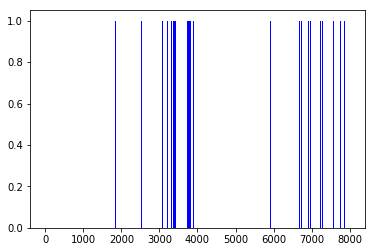

In [30]:
print("Percent of successful episodes : " + str(sum(rList) / num_episodes) + "%")
plt.bar(range(len(rList)), rList, color="blue")
plt.show

## < Cart Pole >

In [4]:
env = gym.make('CartPole-v0')

learning_rate = 1e-1
input_size = env.observation_space.shape[0]
output_size = env.action_space.n

X = tf.placeholder(tf.float32, [None, input_size] , name="input_x")
W1 = tf.get_variable("W1" , shape=[input_size, output_size] , initializer=tf.contrib.layers.xavier_initializer())
Qpred = tf.matmul(X,W1)

Y = tf.placeholder(shape=[None, output_size] , dtype = tf.float32)

loss = tf.reduce_sum(tf.square(Y - Qpred))

train = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)

num_episodes = 2000
dis = 0.9
rList = []


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [6]:
for i in range(num_episodes) :
    e = 1. / ((i / 10) + 1)
    rAll = 0 
    step_count = 0
    s = env.reset()
    done = False 
    while not done :
        step_count += 1
        x = np.reshape(s, [1,input_size])
        Qs = sess.run(Qpred, feed_dict = {X : x})
        if np.random.rand(1) < e :        #다음 action선택
            a = env.action_space.sample()
        else :
            a = np.argmax(Qs)
            
        s1, reward, done, _ = env.step(a)
        if done :                        #action했을 때의 reward 
            Qs[0, a] = -100
        else : 
            x1 = np.reshape(s1, [1,input_size])
            Qs1 = sess.run(Qpred , feed_dict = {X :x1})
            Qs[0, a] = reward + dis * np.max(Qs1)
                
        sess.run(train, feed_dict={X :x , Y : Qs})
        s = s1
    rList.append(step_count)
    print("Episode : {}  steps : {}".format(i , step_count))
    if len(rList) > 10 and np.mean(rList[-10:] ) > 500 :
        break
        
observation = env.reset()
reward_sum = 0 

while True :
    env.render()
    
    x = np.reshape(observation , [1, input_size])
    Qs = sess.run(Qpred, feed_dict= {X : x})
    a= np.argmax(Qs)
    
    observation , reward , done, _ = env.step(a)
    reward_sum += reward
    if done :
        print("Total score : {}".format(reward_sum))
        break

Episode : 0  steps : 35
Episode : 1  steps : 20
Episode : 2  steps : 15
Episode : 3  steps : 44
Episode : 4  steps : 37
Episode : 5  steps : 15
Episode : 6  steps : 79
Episode : 7  steps : 42
Episode : 8  steps : 66
Episode : 9  steps : 9
Episode : 10  steps : 49
Episode : 11  steps : 52
Episode : 12  steps : 54
Episode : 13  steps : 40
Episode : 14  steps : 33
Episode : 15  steps : 48
Episode : 16  steps : 28
Episode : 17  steps : 9
Episode : 18  steps : 42
Episode : 19  steps : 27
Episode : 20  steps : 62
Episode : 21  steps : 23
Episode : 22  steps : 52
Episode : 23  steps : 25
Episode : 24  steps : 18
Episode : 25  steps : 37
Episode : 26  steps : 16
Episode : 27  steps : 22
Episode : 28  steps : 27
Episode : 29  steps : 35
Episode : 30  steps : 58
Episode : 31  steps : 21
Episode : 32  steps : 42
Episode : 33  steps : 37
Episode : 34  steps : 13
Episode : 35  steps : 12
Episode : 36  steps : 24
Episode : 37  steps : 37
Episode : 38  steps : 39
Episode : 39  steps : 33
Episode : 40

Episode : 326  steps : 10
Episode : 327  steps : 36
Episode : 328  steps : 60
Episode : 329  steps : 46
Episode : 330  steps : 61
Episode : 331  steps : 26
Episode : 332  steps : 60
Episode : 333  steps : 36
Episode : 334  steps : 39
Episode : 335  steps : 30
Episode : 336  steps : 9
Episode : 337  steps : 11
Episode : 338  steps : 26
Episode : 339  steps : 63
Episode : 340  steps : 27
Episode : 341  steps : 29
Episode : 342  steps : 27
Episode : 343  steps : 36
Episode : 344  steps : 38
Episode : 345  steps : 28
Episode : 346  steps : 17
Episode : 347  steps : 10
Episode : 348  steps : 10
Episode : 349  steps : 9
Episode : 350  steps : 10
Episode : 351  steps : 10
Episode : 352  steps : 10
Episode : 353  steps : 9
Episode : 354  steps : 28
Episode : 355  steps : 28
Episode : 356  steps : 32
Episode : 357  steps : 40
Episode : 358  steps : 52
Episode : 359  steps : 88
Episode : 360  steps : 42
Episode : 361  steps : 26
Episode : 362  steps : 44
Episode : 363  steps : 26
Episode : 364  

Episode : 646  steps : 35
Episode : 647  steps : 37
Episode : 648  steps : 25
Episode : 649  steps : 30
Episode : 650  steps : 54
Episode : 651  steps : 57
Episode : 652  steps : 46
Episode : 653  steps : 31
Episode : 654  steps : 21
Episode : 655  steps : 32
Episode : 656  steps : 32
Episode : 657  steps : 22
Episode : 658  steps : 28
Episode : 659  steps : 22
Episode : 660  steps : 49
Episode : 661  steps : 19
Episode : 662  steps : 28
Episode : 663  steps : 31
Episode : 664  steps : 16
Episode : 665  steps : 32
Episode : 666  steps : 33
Episode : 667  steps : 24
Episode : 668  steps : 22
Episode : 669  steps : 17
Episode : 670  steps : 42
Episode : 671  steps : 41
Episode : 672  steps : 18
Episode : 673  steps : 49
Episode : 674  steps : 32
Episode : 675  steps : 63
Episode : 676  steps : 30
Episode : 677  steps : 71
Episode : 678  steps : 19
Episode : 679  steps : 36
Episode : 680  steps : 43
Episode : 681  steps : 37
Episode : 682  steps : 25
Episode : 683  steps : 77
Episode : 68

Episode : 963  steps : 49
Episode : 964  steps : 19
Episode : 965  steps : 17
Episode : 966  steps : 20
Episode : 967  steps : 37
Episode : 968  steps : 39
Episode : 969  steps : 23
Episode : 970  steps : 24
Episode : 971  steps : 44
Episode : 972  steps : 55
Episode : 973  steps : 33
Episode : 974  steps : 40
Episode : 975  steps : 95
Episode : 976  steps : 28
Episode : 977  steps : 66
Episode : 978  steps : 36
Episode : 979  steps : 55
Episode : 980  steps : 20
Episode : 981  steps : 49
Episode : 982  steps : 36
Episode : 983  steps : 39
Episode : 984  steps : 26
Episode : 985  steps : 78
Episode : 986  steps : 39
Episode : 987  steps : 40
Episode : 988  steps : 36
Episode : 989  steps : 30
Episode : 990  steps : 34
Episode : 991  steps : 35
Episode : 992  steps : 9
Episode : 993  steps : 9
Episode : 994  steps : 9
Episode : 995  steps : 12
Episode : 996  steps : 38
Episode : 997  steps : 24
Episode : 998  steps : 62
Episode : 999  steps : 36
Episode : 1000  steps : 54
Episode : 1001

Episode : 1269  steps : 27
Episode : 1270  steps : 13
Episode : 1271  steps : 26
Episode : 1272  steps : 24
Episode : 1273  steps : 9
Episode : 1274  steps : 11
Episode : 1275  steps : 9
Episode : 1276  steps : 10
Episode : 1277  steps : 10
Episode : 1278  steps : 10
Episode : 1279  steps : 9
Episode : 1280  steps : 27
Episode : 1281  steps : 11
Episode : 1282  steps : 60
Episode : 1283  steps : 33
Episode : 1284  steps : 44
Episode : 1285  steps : 33
Episode : 1286  steps : 43
Episode : 1287  steps : 23
Episode : 1288  steps : 12
Episode : 1289  steps : 18
Episode : 1290  steps : 20
Episode : 1291  steps : 9
Episode : 1292  steps : 22
Episode : 1293  steps : 26
Episode : 1294  steps : 8
Episode : 1295  steps : 9
Episode : 1296  steps : 9
Episode : 1297  steps : 9
Episode : 1298  steps : 22
Episode : 1299  steps : 28
Episode : 1300  steps : 29
Episode : 1301  steps : 12
Episode : 1302  steps : 16
Episode : 1303  steps : 23
Episode : 1304  steps : 27
Episode : 1305  steps : 16
Episode :

Episode : 1573  steps : 18
Episode : 1574  steps : 28
Episode : 1575  steps : 19
Episode : 1576  steps : 31
Episode : 1577  steps : 11
Episode : 1578  steps : 23
Episode : 1579  steps : 30
Episode : 1580  steps : 14
Episode : 1581  steps : 8
Episode : 1582  steps : 9
Episode : 1583  steps : 10
Episode : 1584  steps : 14
Episode : 1585  steps : 14
Episode : 1586  steps : 46
Episode : 1587  steps : 20
Episode : 1588  steps : 21
Episode : 1589  steps : 32
Episode : 1590  steps : 31
Episode : 1591  steps : 21
Episode : 1592  steps : 40
Episode : 1593  steps : 30
Episode : 1594  steps : 39
Episode : 1595  steps : 20
Episode : 1596  steps : 39
Episode : 1597  steps : 20
Episode : 1598  steps : 58
Episode : 1599  steps : 20
Episode : 1600  steps : 20
Episode : 1601  steps : 14
Episode : 1602  steps : 18
Episode : 1603  steps : 32
Episode : 1604  steps : 26
Episode : 1605  steps : 24
Episode : 1606  steps : 27
Episode : 1607  steps : 15
Episode : 1608  steps : 24
Episode : 1609  steps : 23
Epi

Episode : 1882  steps : 40
Episode : 1883  steps : 28
Episode : 1884  steps : 23
Episode : 1885  steps : 34
Episode : 1886  steps : 21
Episode : 1887  steps : 35
Episode : 1888  steps : 23
Episode : 1889  steps : 21
Episode : 1890  steps : 40
Episode : 1891  steps : 56
Episode : 1892  steps : 23
Episode : 1893  steps : 22
Episode : 1894  steps : 34
Episode : 1895  steps : 40
Episode : 1896  steps : 23
Episode : 1897  steps : 28
Episode : 1898  steps : 10
Episode : 1899  steps : 37
Episode : 1900  steps : 18
Episode : 1901  steps : 26
Episode : 1902  steps : 23
Episode : 1903  steps : 22
Episode : 1904  steps : 32
Episode : 1905  steps : 51
Episode : 1906  steps : 10
Episode : 1907  steps : 10
Episode : 1908  steps : 22
Episode : 1909  steps : 10
Episode : 1910  steps : 10
Episode : 1911  steps : 9
Episode : 1912  steps : 27
Episode : 1913  steps : 16
Episode : 1914  steps : 25
Episode : 1915  steps : 30
Episode : 1916  steps : 41
Episode : 1917  steps : 19
Episode : 1918  steps : 11
Ep

NameError: name 'breakv' is not defined